In [19]:
"""
https://community.plotly.com/t/how-to-show-overlap-points-in-scatter-plot/24148/14
"""
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# import plotly.io as io
# io.renderers.default = 'svg'

df = pd.read_excel("https://www.dropbox.com/s/za5e81lksyipztm/tips_2.xlsx?dl=1")

fig = px.strip(df, x='day', y='total_bill', color="day").update_traces(jitter = 1,
                                                                       opacity=0.8,
                                                                       marker_size=10,
                                                                       marker_line_width=1)

# Group and calculate the mean and sem
mean = df.groupby('day').mean()
sem = df.groupby('day').sem()


# Add traces for mean and sem
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=mean.index, 
        y=mean['total_bill'],
        error_y_array=sem['total_bill'],
        marker=dict(symbol='141', color='rgba(0,0,0,0.6)', size=30,
        line=dict(width=2)
        ),
        showlegend=False
    )
)

#  Customization of y-axis
#fig.update_yaxes(range=[0, 10])

# Figure layout
fig.update_layout(template='simple_white',  width=400, height=500, title='Main Title', yaxis_title='Distance moved',
                  legend=dict(title='', itemclick='toggle', itemsizing='constant', traceorder='normal',
                  bgcolor='rgba(0,0,0,0)', x=1),
                  #margin=dict(color="black",width=3),
                  xaxis=dict(title='This is a title', showticklabels=True, ticks='outside', type='category')
                 )

# Make figure zoomable
config = dict({'scrollZoom':True})

fig.show(config=config)

In [24]:
sem.reset_index()
mean.reset_index()
mean


,total_bill,sem
day,,
Sat,47.48,0.4982
Sun,53.06,0.4352


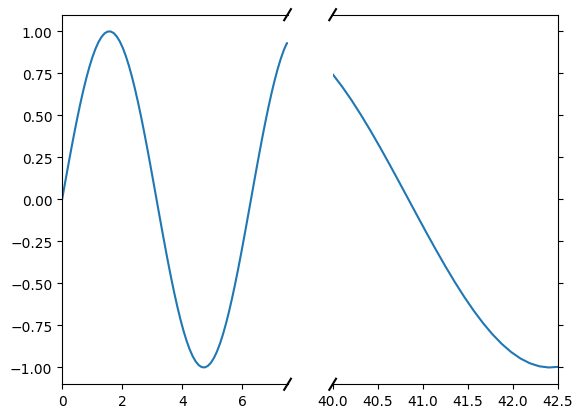

In [11]:
"""
https://stackoverflow.com/questions/32185411/break-in-x-axis-of-matplotlib
"""
import matplotlib.pylab as plt
import numpy as np

def draw():
    x = np.linspace(0,10,100)
    x[75:] = np.linspace(40,42.5,25)

    y = np.sin(x)

    f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

    # plot the same data on both axes
    ax.plot(x, y)
    ax2.plot(x, y)

    ax.set_xlim(0,7.5)
    ax2.set_xlim(40,42.5)

    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.yaxis.tick_left()
    # ax.tick_params(labelright='off')
    ax2.yaxis.tick_right()
    # ax2.tick_params(labelright='off')
    
    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1-d,1+d), (-d,+d), **kwargs)
    ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d), (1-d,1+d), **kwargs)
    ax2.plot((-d,+d), (-d,+d), **kwargs)

    # What's cool about this is that now if we vary the distance between
    # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
    # the diagonal lines will move accordingly, and stay right at the tips
    # of the spines they are 'breaking'

    plt.show()
draw()

In [ ]:
"""
https://rowannicholls.github.io/python/graphs/ax_based/boxplots_significance.html
"""